### Import libraries

In [87]:
import plotly
plotly.tools.set_credentials_file(username='maryammohamed61@gmail.com', api_key='BI7V1Kk7b12xlZsuE5BI')

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import plotly.plotly as py
from currency_converter import CurrencyConverter
import plotly
import plotly.graph_objs as go

In [8]:
c = CurrencyConverter()

In [2]:
!ls ../data/external-data-for-kiva-crowdfunding/data-science-for-good-kiva-crowdfunding

kiva_loans.csv                loan_theme_ids.csv
kiva_mpi_region_locations.csv loan_themes_by_region.csv


In [3]:
loans = pd.read_csv('../data/external-data-for-kiva-crowdfunding/data-science-for-good-kiva-crowdfunding/kiva_loans.csv')
theme_ids=pd.read_csv('../data/external-data-for-kiva-crowdfunding/data-science-for-good-kiva-crowdfunding/loan_theme_ids.csv')
mpi_region_locations=pd.read_csv('../data/external-data-for-kiva-crowdfunding/data-science-for-good-kiva-crowdfunding/kiva_mpi_region_locations.csv')
themes_by_region=pd.read_csv('../data/external-data-for-kiva-crowdfunding/data-science-for-good-kiva-crowdfunding/loan_themes_by_region.csv')

In [15]:
loans.head(10)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,NaN,2014-01-01 10:06:19+00:00,2014-01-30 01:42:48+00:00,2014-01-29 14:14:57+00:00,4.0,6,NaN,female,irregular,2014-01-01
6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:51:02+00:00,2013-12-16 08:00:00+00:00,2014-01-01 17:18:09+00:00,43.0,8,"user_favorite, user_favorite",female,bullet,2014-01-01
7,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,245.0,2014-01-01 11:46:01+00:00,2013-12-20 08:00:00+00:00,2014-01-10 18:18:44+00:00,14.0,8,"#Elderly, #Woman Owned Biz",female,monthly,2014-01-01
8,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,245.0,2014-01-01 11:49:43+00:00,2013-12-20 08:00:00+00:00,2014-01-01 18:47:21+00:00,14.0,19,user_favorite,female,monthly,2014-01-01
9,653048,625.0,625.0,Food Production/Sales,Food,"to buy a stall, gram flour, ketchup, and coal ...",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 05:41:03+00:00,2013-12-17 08:00:00+00:00,2014-01-03 15:45:04+00:00,11.0,24,NaN,female,irregular,2014-01-01


In [5]:
theme_ids.head()

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0
2,641006,a1050000002X1ij,Higher Education,160.0
3,641019,a1050000002X1ij,Higher Education,160.0
4,641594,a1050000002VbsW,Subsistence Agriculture,336.0


In [6]:
mpi_region_locations.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [7]:
themes_by_region.head()

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0


In [8]:
sum((loans.loan_amount - loans.funded_amount) == 0) / len(loans)

0.9279951728607504

In [9]:
# np.mean(loans.loan_amount - loans.funded_amount)

56.40204557474989

In [10]:
# np.mean(abs(loans.loan_amount - loans.funded_amount))

56.403311953874

In [19]:
diff_fund_post = list(map(lambda x: x.days, pd.to_datetime(loans.funded_time) - pd.to_datetime(loans.posted_time)))
diff_fund_post = list(filter(lambda y: not math.isnan(y), diff_fund_post))
np.mean(diff_fund_post)

14.153122461364578

In [20]:
max(diff_fund_post), min(diff_fund_post)

(420, -18)

In [21]:
diff_post_disburse = list(map(lambda x: x.days, pd.to_datetime(loans.posted_time) - pd.to_datetime(loans.disbursed_time)))
diff_post_disburse = list(filter(lambda y: not math.isnan(y), diff_post_disburse))
np.mean(diff_post_disburse)

13.618414225885118

In [22]:
max(diff_post_disburse), min(diff_post_disburse)

(32, -428)

In [23]:
loans['diff_fund_post'] = list(map(lambda x: x.days, pd.to_datetime(loans.funded_time) - pd.to_datetime(loans.posted_time)))
loans['diff_post_disburse'] = list(map(lambda x: x.days, pd.to_datetime(loans.posted_time) - pd.to_datetime(loans.disbursed_time)))

In [24]:
loans.diff_fund_post.fillna(0, inplace=True)
loans.diff_post_disburse.fillna(0, inplace=True)

In [27]:
# sns.lmplot(x="funded_amount", y="diff_fund_post", data=loans, lowess=True)
# plt.xlabel('Amount of fund')
# plt.ylabel('Difference in days between fund date and post date')
# plt.show()

In [22]:
set(loans.sector)

{'Agriculture',
 'Arts',
 'Clothing',
 'Construction',
 'Education',
 'Entertainment',
 'Food',
 'Health',
 'Housing',
 'Manufacturing',
 'Personal Use',
 'Retail',
 'Services',
 'Transportation',
 'Wholesale'}

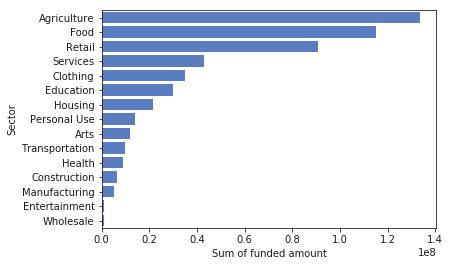

In [28]:
# f, (ax1, ax2) = plt.subplots(1, 2)

# f.set_figwidth(10)

sns.set_color_codes("muted")

# temp = loans.groupby('sector')['funded_amount'].size().sort_values(ascending=False)
# sns.barplot(x=temp, y=temp.index, color="b", ax=ax1)
# ax1.set_xlabel('Number of loans (funded amounts)')
# ax1.set_ylabel('Sector')

temp2 = loans.groupby('sector')['funded_amount'].sum().sort_values(ascending=False)
sns.barplot(x=temp2, y=temp2.index, color="b")
plt.xlabel('Sum of funded amount')
plt.ylabel('Sector')

# f.tight_layout()
plt.show()

In [119]:
bar = go.Bar(
    x= np.log10(temp2 + 1),
    y= temp2.index,
    marker=dict(color='#A2D5F2'),
    orientation = 'h'
        )

layout = dict(
  title= 'Log of sum of loans by sector',
  barmode= 'stack',
    xaxis=dict(
        title='Log of sum of loans',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
        )


data = [bar]


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [33]:
sum_funded_amount = loans.groupby('country').sum()['funded_amount']

In [34]:
fund_amount = pd.DataFrame(sum_funded_amount, index=sum_funded_amount.index)

In [35]:
fund_amount.reset_index(level=0, inplace=True)

In [36]:
fund_amount.head()

,country,funded_amount
0,Afghanistan,14000.0
1,Albania,2490000.0
2,Armenia,11186675.0
3,Azerbaijan,2699575.0
4,Belize,114025.0


In [47]:
merged = pd.merge(fund_amount, themes_by_region, left_on='country', right_on='country')

In [48]:
merged = merged[['funded_amount', 'country', 'lat', 'lon']]

In [56]:
merged = merged[~merged['country'].duplicated()]

In [59]:
merged = merged[~np.isnan(merged.lat)]

In [95]:
data = [dict(
        type='choropleth',
        locations=merged['country'],
        locationmode='country names',
        z=merged['funded_amount'],
        text=merged['country'],
        colorscale='Viridis',
        reversescale=False,
        marker=dict(line=dict(color='rgb(180,180,180)', width=0.5)),
        colorbar=dict(autotick=False, tickprefix='', title='Loans'),
)]
layout = dict(
    title = 'Number of loans by Country',
    geo = dict(showframe=False, showcoastlines=True, projection=dict(type='Mercator'))
)
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='fund')

In [168]:

data = [dict(
        type='choropleth',
        locations=mpi_region_locations['LocationName'],
        locationmode='country names',
        z=mpi_region_locations['MPI'],
        text=mpi_region_locations['region'],
        colorscale='Viridis',
        reversescale=False,
        marker=dict(line=dict(color='rgb(180,180,180)', width=0.5)),
        colorbar=dict(autotick=False, tickprefix='', title='MPI Values'),
)]
layout = dict(
    title = 'MPI by region',
    geo = dict(showframe=False, showcoastlines=True, projection=dict(type='Mercator'))
)
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='mpi')

In [141]:
loans.borrower_genders.fillna('', inplace=True)

In [142]:
list(filter(lambda x: type(x) != str, loans.borrower_genders))

[]

In [144]:
loans['female_count'] = list(map(lambda y: y.count('female'), loans.borrower_genders))

In [145]:
loans['male_count'] = list(map(lambda y: y.count('male'), loans.borrower_genders))

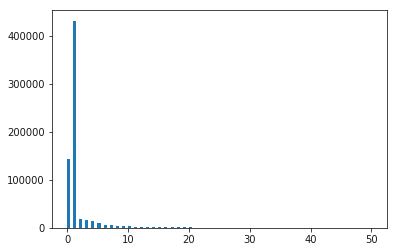

In [156]:
plt.hist(loans['female_count'], bins=100)
plt.show()

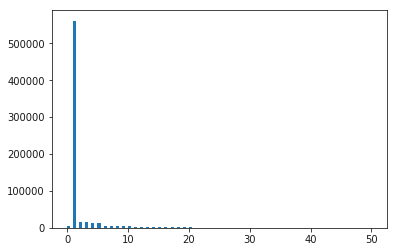

In [157]:
plt.hist(loans['male_count'], bins=100)
plt.show()